In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification, load_digits, load_diabetes
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# plt.rc('text', usetex=True)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)



From Logistic Regression to SVM => from exploring the expected statistics property to exploring the geometric property

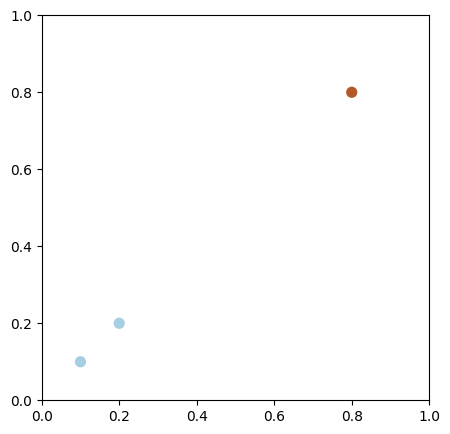

SVC(kernel='linear')

In [22]:

X = [[0.2, 0.2], [0.8, 0.8], ]
y = [0, 1]

X.append( [0.1, 0.1])
y.append(0)
# # generate a list of data points with values less than 0.2
# for i in range(10):
#     X.append(np.random.rand(2) * 0.2)
#     y.append(0)
# # generate a list of data points with values greater than 0.8
# for i in range(10):
#     X.append(np.random.rand(2) * 0.2 + 0.8)
#     y.append(1)
# draw the data
plt.figure(figsize=(5, 5))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, s=50, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# fit the model
clf = svm.SVC( kernel = 'linear')
clf.fit(X, y)


What is the good decision boundary to separate observations? 

Think about the decision boundary that has the largest distance to the nearest training data points of any class




[Support Vector Machine](https://link.springer.com/content/pdf/10.1007/bf00994018.pdf)
* The Assumption of SVM
    + "in general the larger the margin the lower the generalization error of the classifier"

* The Goal of SVM
    + maximize the margin via flat, affine hyperplane in high dimensional space
    + so-called maximum  margin classifier

* What are the parameters?


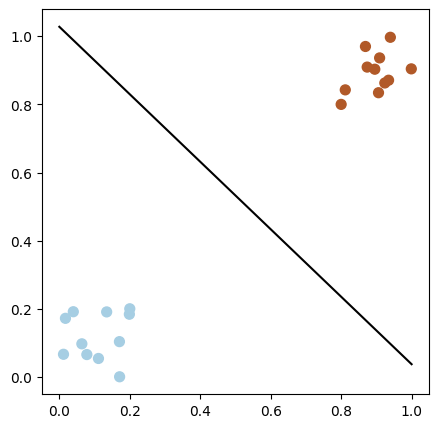

In [15]:
clf.coef_

# draw the decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 1)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.figure(figsize=(5, 5))
plt.plot(xx, yy, 'k-')
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, s=50, cmap=plt.cm.Paired)
plt.show()


* How to find the decision boundary maximizing the margin? 
    + Find w to maximize the margin, since [w defines a hyperplane](decision_boundary.ipynb)


How to calculate the margin
* Firstly, we need define two boundary hyperplanes to calculate the margin: 1) furthest lines which can separate all the training examples of each class 2) also parallel to the decision boundary 
    $$\bar{\omega} \cdot \bar{x}_{+}+b \geq 1$$

    $$\bar{\omega} \cdot \bar{x}_{-}+b \leq -1$$

    $$\Rightarrow y_i\left(w^T x_i+b\right) \geq 1 \quad \forall i$$ 
    where $y_i=1$ for positive examples and $y_i=-1$ for negative examples

    <center><img src="pics/svm3.png" width="500"></center>

* Now, calculate the margin
$$\left(\bar{x}_{+}-\bar{x}_{-}\right) \cdot \frac{\omega}{\|\omega\|}$$ 
Where $\bar{x}_{+}=1-b$ and $\bar{x}_{-}=1+b$ 

Finally, we get $$\frac{2}{||w||}$$

<center><img src="pics/svm_margin.png" width="500"></center>

* Final form of objective can be defined as a quadratic programming problem:
    
    $$\min \frac{1}{2}\|w\|^2 \text { subject to } y_i\left(w^T x_i+b\right) \geq 1 \quad \forall i$$

    this is a quadratic programming problem, so we cannot solve it numerically using direct gradient descent approach
    
    $$\min \frac{1}{2}\|w\|^2 - \sum_i \alpha_i (y_i\left(w^T x_i+b\right) - 1) $$
         
    $$w=\sum_i \alpha_i y_i x_i$$

    lagrangian multiplier


* Compared to the Decision Boundary for Logistic Regression:
    + only one v.s. indefinite
    + is only determined by the support vectors v.s. all the data points
    <center><img src="pics/svm1.png" width="500"></center>


In [23]:
# fit the model
clf = svm.SVC( kernel = 'linear')
clf.fit(X, y)

# print('support vectors: ', clf.support_vectors_)
print('indices of support vectors: ', clf.support_)
print('number of support vectors for each class: ', clf.n_support_)


indices of support vectors:  [0 1]
number of support vectors for each class:  [1 1]


## Soft margin
* Drawback of hard margin: sensitive to outliers
    + Soft margin allows misclassification (bias-variance tradeoff)
    + Hyperparameter: how many misclassifications are allowed inside of the soft margin or on the edge (Support vectors)?
    + Slack variable
    $$\min \frac{1}{2}\|w\|^2 - \sum_i \alpha_i (y_i\left(w^T x_i+b\right) - 1) $$

    $$\begin{array}{ll} & \min \frac{1}{2}\|w\|_2^2+ \lambda \sum \xi_i \\ \text { s.t } & y_i\left(w^T x_i+b\right) \geq 1-\xi_i \\ & \boldsymbol{\xi} \succeq \mathbf{0} \end{array}$$

This is the same as we try to penalize the misclassified training example $\boldsymbol{\xi} $ by adding $C\boldsymbol{\xi}$ to our objective to be minimized. Recall [hinge loss](https://stats.stackexchange.com/questions/74499/what-is-the-loss-function-of-hard-margin-svm#:~:text=People%20says%20soft%20margin%20SVM%20use%20hinge%20loss,yi%28w%20%E2%8A%BA%20xi%20%2B%20b%29%29%20term%20loss%20function.):
$$\ell_{\text {hinge }}(z)=\max \{0,1-z\}$$


In [ ]:
clf = svm.SVC( kernel = 'linear', loss='hinge', C=1)

## Kernel tricks


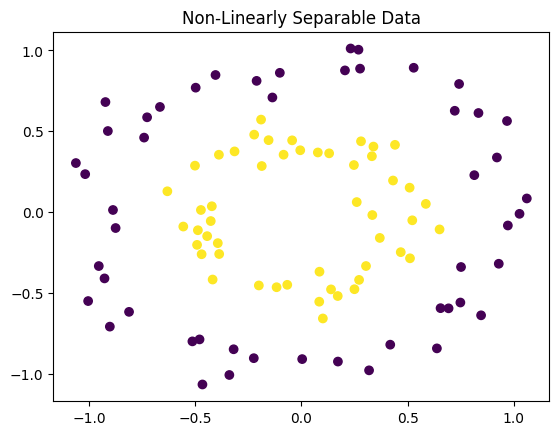

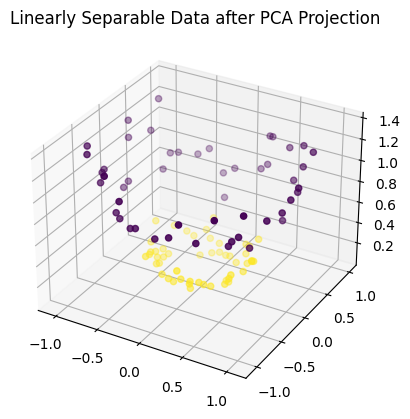

In [24]:
# rbf_svc = svm.SVC(kernel='rbf')
# rbf_svc.kernel

# svm project low-dimension data to high-dimension
# to make the data linearly separable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA

# Generate some non-linearly separable data
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=1)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Non-Linearly Separable Data")
plt.show()

# for each example, add a third dimension by squaring x1 and x2
X = np.hstack((X, np.reshape(X[:, 0]**2 + X[:, 1]**2, (100, 1))))

# Visualize the data after projection
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_title("Linearly Separable Data after PCA Projection")
plt.show()




* [Different typs of feature transformation and their corresponding kernel functions](https://www.youtube.com/watch?v=Q7vT0--5VII)
* Kernel functions to systematically find SVC in higher dimension
    - linear: $\left\langle x, x^{\prime}\right\rangle$.
    - polynomial: $\left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)^d$, where $d$ is specified by parameter degree, $r$ by coefo.
    - radial basis function: $\exp \left(-\gamma\left\|x-x^{\prime}\right\|^2\right)$, where $\gamma$ is specified by parameter gamma, must be greater than 0 .
    - sigmoid $\tanh \left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)$, where $r$ is specified by coefo.
* The kernel tricks actualy never explicitly map your data into the RKHS


It turns out that the plane in the 3-D space is the circle in the 2-D space.

## Multiclass Classification
* one-versus-one: n_classes * (n_classes - 1) / 2 classifiers according to the combination formula
* one-vs-rest: n_classes classifiers

In [13]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo') # one vs one
clf.fit(X, Y)

dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

6

In [19]:
clf.dual_coef_.shape  # (n_classes-1, n_SV)
clf.intercept_.shape # (n_classes * (n_classes - 1) / 2)

# each row now corresponding to a binary classifier. The order for classes 0 to n is 
# “0 vs 1”, “0 vs 2” , … “0 vs n”, “1 vs 2”, “1 vs 3”, “1 vs n”, . . . “n-1 vs n”

(6,)

In [7]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

 LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_classes models

In [10]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

dec = lin_clf.decision_function([[1]])
dec.shape[1]


4

In [11]:

lin_clf.coef_.shape  # (n_classes, n_features) 
lin_clf.intercept_.shape # (n_classes,)

# Each row of the coefficients corresponds to one of the n_classes “one-vs-rest” classifiers

(4, 1)

## Pass Activity

Original dataset dimensions: (1797, 64)
Modified dataset dimensions: (1797, 3)


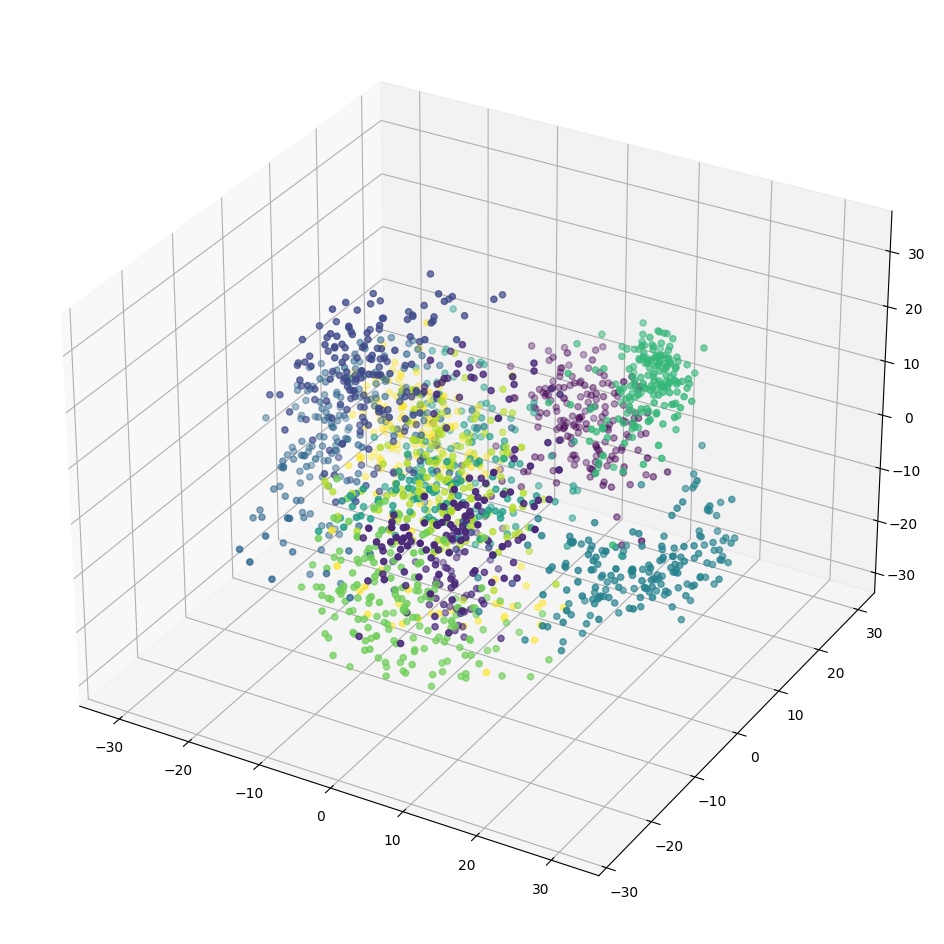

In [11]:
# Q1: Load "digits" datasets from SKlearn and print the dimension of the dataset.  
# Apply PCA on the dataset and select first three components.
# Print the dimension of modified dataset and visualise the data using appropriate plotting tool/s. 
def dim_reduce(data_norm, y, n_components=3, method='PCA'):
    """ Dimensionality reduction using PCA or t-SNE
    Args:
        data_norm: normalized data
        y: labels for visualization
        n_components: number of components to keep
        method: 'PCA' or 't-SNE'
    """
    print("Original dataset dimensions:", data_norm.shape)
    if method == 'PCA':
        # perform PCA using sklearn PCA implementation
        model = PCA(n_components=n_components, random_state=2)
        model.fit(data_norm)
        reduced_X = model.transform(data_norm)
    elif method == 't-SNE':
        # perform t-SNE using sklearn t-SNE implementation
        model = TSNE(n_components=n_components, random_state=2)
        reduced_X = model.fit_transform(data_norm)
    else:
        raise ValueError('Invalid method')
    print("Modified dataset dimensions:", reduced_X.shape)
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(reduced_X[:, 0], reduced_X[:, 1], reduced_X[:, 2],c=y)
    plt.show()
    return model, reduced_X

df = load_digits()
X = df.data
y = df.target

pca, reduced_X = dim_reduce(X, y, n_components=3)

In [12]:
# Q2: Classify the digit classes available in the dataset (use the modified dataset) using SVM with RBF kernel. 
# Select appropriate data splitting approach and performance metrics. 
# Report the performances and the used model hyper-parameters.  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y) 
clf = svm.SVC(kernel='rbf')

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Report the best hyperparameters and train the final model
print("Best hyperparameters:", grid_search.best_params_)
final_model = grid_search.best_estimator_

# Model evaluation
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))


Best hyperparameters: {'C': 10, 'gamma': 0.01}
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        36
           1       1.00      0.81      0.89        36
           2       1.00      0.86      0.92        35
           3       1.00      0.89      0.94        37
           4       1.00      0.89      0.94        36
           5       1.00      1.00      1.00        37
           6       1.00      0.81      0.89        36
           7       1.00      0.72      0.84        36
           8       0.41      1.00      0.58        35
           9       1.00      0.86      0.93        36

    accuracy                           0.86       360
   macro avg       0.94      0.86      0.88       360
weighted avg       0.94      0.86      0.88       360



In [5]:
clf = svm.SVC(C=1., kernel='linear')
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


0.98

In [4]:
clf = svm.SVC(gamma=0.001, C=100., kernel='linear')
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.98

In [6]:
clf = svm.SVC(gamma=0.001, C=100., kernel='rbf')
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


0.9933333333333333

Original dataset dimensions: (442, 10)
Modified dataset dimensions: (442, 3)


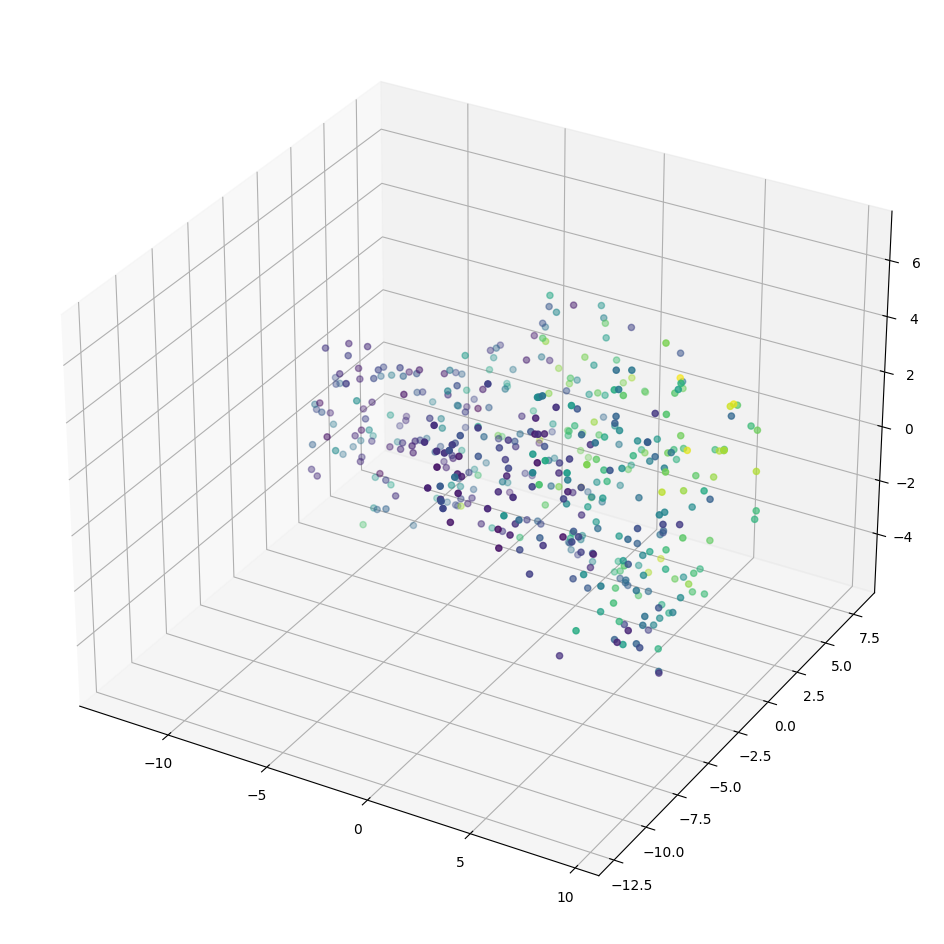

In [29]:
# 3. Load "diabetes" datasets from SKlearn and print the dimension of the dataset. 
# Apply tSNE method to reduce dimension and select first three components. 
# Plot the selected components using appropriate visualisation technique. 

# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


# Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Perform dimensionality reduction using t-SNE
pca, reduced_X = dim_reduce(X_norm, y, n_components=3, method='t-SNE')


In [36]:
svc = svm.SVR(kernel='poly')

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Report the best hyperparameters and train the final model
print("Best hyperparameters:", grid_search.best_params_)
final_model = grid_search.best_estimator_

# Model evaluation
y_pred = final_model.predict(X_test)

# report MSE
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

Best hyperparameters: {'C': 10, 'degree': 3}
MSE: 4471.387152910591
R2: 0.1717057733387739


In [ ]:
# 6. Based on the model hyper-parameters used in task-2 and task-5, 
# share your understanding of hyper-parameters tuning in ML model development.